In [15]:
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler

In [21]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# Load dataset (jika belum load)
df = pd.read_excel('/kaggle/input/cow-health-prediction/cattle_dataset.xlsx')

le = LabelEncoder()
df['health_status_encoded'] = le.fit_transform(df['health_status'])

# Pilih fitur yang ingin digunakan
features = ['heart_rate', 'respiratory_rate', 'body_temperature']

X = df[features]
y = df['health_status_encoded']

# Split dan scaling data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train model Random Forest dengan 3 fitur
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_scaled, y_train)

# Prediksi
y_pred = rf_model.predict(X_test_scaled)

# Evaluasi performa model
print("Model Performance:")
print(classification_report(y_test, y_pred))

# Feature importance (meskipun cuma 3 fitur)
feature_importance = pd.DataFrame({
    'feature': features,
    'importance': rf_model.feature_importances_
}).sort_values('importance', ascending=False)

print("\nFeature Importance:")
print(feature_importance)


ValueError: could not convert string to float: 'Cross Breed'

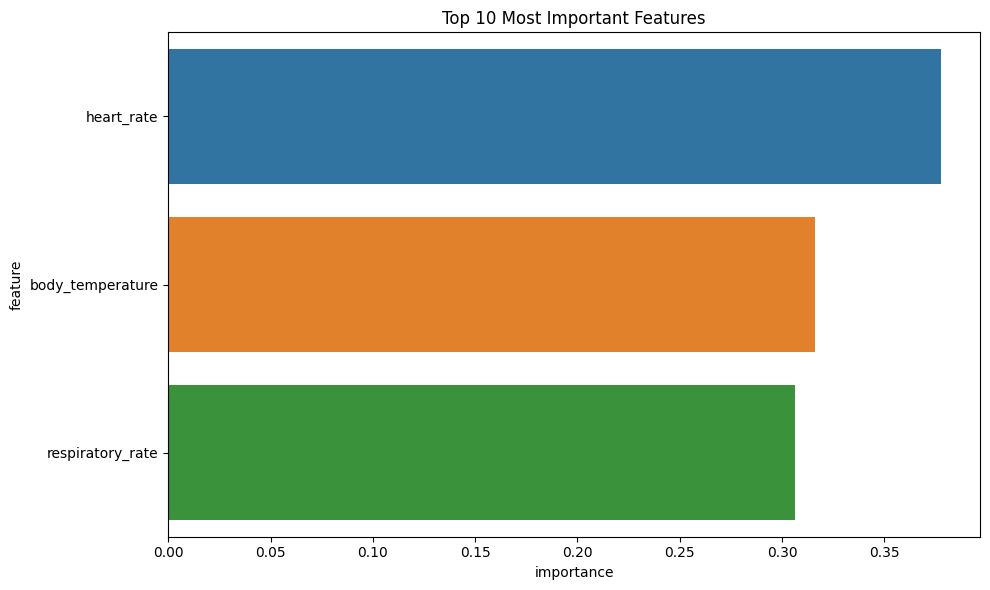

In [17]:
plt.figure(figsize=(10, 6))
sns.barplot(x='importance', y='feature', data=feature_importance.head(10))
plt.title('Top 10 Most Important Features')
plt.tight_layout()
plt.show()

In [19]:
# Fitur yang dipakai
features = ['heart_rate', 'respiratory_rate', 'body_temperature']

# Update contoh data input supaya hanya ada 3 fitur ini saja
healthy_cow = {
    'heart_rate': 600,
    'respiratory_rate': 30,
    'body_temperature': 38.5
}

unhealthy_cow = {
    'heart_rate': 75,
    'respiratory_rate': 45,
    'body_temperature': 39.8
}

def predict_cow_health(data_point, model, scaler, feature_names):
    """
    Make prediction for a single cow's health status based on selected features
    """
    # Pastikan input hanya fitur yang dibutuhkan
    filtered_data = {k: data_point[k] for k in feature_names}
    
    # Ubah jadi DataFrame
    data_point_df = pd.DataFrame([filtered_data], columns=feature_names)
    
    # Scale fitur
    data_point_scaled = scaler.transform(data_point_df)
    
    # Prediksi
    prediction = model.predict(data_point_scaled)
    probability = model.predict_proba(data_point_scaled)
    
    return prediction[0], probability[0]

def monitor_cow_health(sensor_readings, model, scaler, feature_names):
    """
    Monitor cow health dengan real-time sensor readings, hanya dengan fitur yang dipakai
    """
    prediction, probabilities = predict_cow_health(sensor_readings, model, scaler, feature_names)
    
    # Definisikan level risiko
    risk_level = "Low" if probabilities[1] < 0.3 else "Medium" if probabilities[1] < 0.7 else "High"
    
    # Generate alert berdasarkan fitur yang ada
    alerts = []
    if sensor_readings['body_temperature'] > 39.5:
        alerts.append("High body temperature detected!")
    if sensor_readings['respiratory_rate'] > 40:
        alerts.append("High respiratory rate detected!")
    if sensor_readings['heart_rate'] > 70:
        alerts.append("High heart rate detected!")
        
    return {
        'prediction': 'Healthy' if prediction == 0 else 'Unhealthy',
        'confidence': max(probabilities),
        'risk_level': risk_level,
        'alerts': alerts
    }

# Test prediksi dan monitoring dengan 3 fitur saja
print("Prediction for Healthy Cow Parameters:")
pred_healthy, prob_healthy = predict_cow_health(healthy_cow, rf_model, scaler, features)
print(f"Prediction: {'Healthy' if pred_healthy == 0 else 'Unhealthy'}")
print(f"Probability: Healthy={prob_healthy[0]:.2%}, Unhealthy={prob_healthy[1]:.2%}")

print("\nPrediction for Unhealthy Cow Parameters:")
pred_unhealthy, prob_unhealthy = predict_cow_health(unhealthy_cow, rf_model, scaler, features)
print(f"Prediction: {'Healthy' if pred_unhealthy == 0 else 'Unhealthy'}")
print(f"Probability: Healthy={prob_unhealthy[0]:.2%}, Unhealthy={prob_unhealthy[1]:.2%}")

print("\nSimulating Real-time Monitoring:")
monitoring_result = monitor_cow_health(unhealthy_cow, rf_model, scaler, features)
print("\nMonitoring Results:")
print(f"Health Status: {monitoring_result['prediction']}")
print(f"Confidence: {monitoring_result['confidence']:.2%}")
print(f"Risk Level: {monitoring_result['risk_level']}")
if monitoring_result['alerts']:
    print("\nAlerts:")
    for alert in monitoring_result['alerts']:
        print(f"- {alert}")


Prediction for Healthy Cow Parameters:
Prediction: Healthy
Probability: Healthy=95.00%, Unhealthy=5.00%

Prediction for Unhealthy Cow Parameters:
Prediction: Healthy
Probability: Healthy=67.00%, Unhealthy=33.00%

Simulating Real-time Monitoring:

Monitoring Results:
Health Status: Healthy
Confidence: 67.00%
Risk Level: Medium

Alerts:
- High body temperature detected!
- High respiratory rate detected!
- High heart rate detected!
